In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [2]:
first_url = 'https://www.imdb.com/search/title/?title_type=feature&num_votes=10000,&sort=user_rating,desc&ref_=adv_prv'

In [3]:
page = requests.get(first_url)
soup = BeautifulSoup(page.content, "html.parser")
scraped_movies = soup.find_all('div', class_='lister-item')
scraped_movies

[<div class="lister-item mode-advanced">
 <div class="lister-top-right">
 <div class="ribbonize" data-caller="filmosearch" data-tconst="tt0252487"></div>
 </div>
 <div class="lister-item-image float-left">
 <a href="/title/tt0252487/"> <img alt="Hababam Sinifi" class="loadlate" data-tconst="tt0252487" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BOWI4NGQ1M2YtNDM2Yi00YzAzLWJmZmYtMjkxZWMwNmM5Y2NhXkEyXkFqcGdeQXVyMjQ2OTI2MzU@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
 </a> </div>
 <div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt0252487/">Hababam Sinifi</a>
 <span class="lister-item-year text-muted unbold">(1975)</span>
 </h3>
 <p class="text-muted">
 <span class="certificate">18+</span>
 <span class="ghost">|</span>
 <span class="runtime">87 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Com

In [5]:
def get_data(scraped_movies):
    ls = []
    
    for movie in scraped_movies:
        try:
            img_url = movie.find_all('div', class_='lister-item-image')[0].find_all('img', src=True)[0]['loadlate']
            title =  movie.find_all('div', class_='lister-item-image')[0].find_all('img', src=True)[0]['alt']
            year = movie.find_all('span', class_='lister-item-year')[0].get_text()
            try:
                certificate = movie.find_all('span', class_='certificate')[0].get_text()
            except:
                certificate = None
            duration = movie.find_all('span', class_='runtime')[0].get_text()
            genre = movie.find_all('span', class_='genre')[0].get_text()
            imdb = movie.find_all('div', class_='ratings-bar')[0].find_all('strong')[0].get_text()
            try:

                metascore = movie.find_all('span', class_='metascore')[0].get_text()
            except:
                metascore = None
            overview = movie.find_all('p', class_='text-muted')[1].get_text()
            director = movie.find_all('p', class_='')[0].find_all('a')[0].get_text()
            actors = []
            k = 0
            for actor in movie.find_all('p', class_='')[0].find_all('a'):
                if k != 0:
                    actors.append(actor.get_text())
                k += 1
            actors = ",".join(actors)
            votes = movie.find_all('span', {"name":"nv"})[0].get_text()

            tmp_ls = [img_url, title, year, certificate, duration, genre, imdb, metascore, overview, director, actors]
            ls.append(tmp_ls)
        except:
            print(title)
            
    return ls

In [10]:
i = 0
ls = []
while True:
    if i == 0:
        page = requests.get(first_url)
        soup = BeautifulSoup(page.content, "html.parser")
        scraped_movies = soup.find_all('div', class_='lister-item')
        ls = get_data(scraped_movies)
    else:
        url = f"https://www.imdb.com/search/title/?title_type=feature&num_votes=10000,&sort=user_rating,desc&start={i+1}&ref_=adv_nxt"
        page = requests.get(url)
        soup = BeautifulSoup(page.content, "html.parser")
        scraped_movies = soup.find_all('div', class_='lister-item')
        tmp_ls = get_data(scraped_movies)
        ls = ls + tmp_ls
    i += 50
    print(i)
    if i == 10000:
        print("finished")
        break

50
100
150
200
250
300
350
400
450
500
550
600
650
700
750
800
850
900
950
1000
1050
1100
1150
1200
1250
1300
1350
1400
1450
1500
1550
1600
1650
1700
1750
1800
1850
1900
1950
2000
2050
2100
2150
2200
2250
2300
2350
2400
2450
2500
2550
2600
2650
2700
2750
2800
2850
2900
2950
3000
3050
3100
3150
3200
3250
3300
3350
3400
3450
3500
3550
3600
3650
3700
3750
3800
3850
3900
3950
4000
4050
4100
4150
4200
4250
4300
4350
4400
4450
4500
4550
4600
4650
4700
4750
4800
4850
4900
4950
5000
5050
5100
5150
5200
5250
5300
5350
5400
5450
5500
5550
5600
5650
5700
5750
5800
5850
5900
5950
6000
6050
6100
6150
6200
6250
6300
6350
6400
6450
6500
6550
6600
6650
6700
6750
6800
6850
6900
6950
7000
7050
7100
7150
7200
7250
7300
7350
7400
7450
7500
7550
7600
7650
7700
7750
7800
7850
7900
7950
8000
8050
8100
8150
8200
8250
8300
8350
8400
8450
8500
8550
8600
8650
8700
8750
8800
8850
8900
8950
9000
9050
9100
9150
9200
9250
9300
9350
9400
9450
9500
9550
9600
9650
9700
9750
9800
9850
9900
9950
10000
finished


In [11]:
len(ls)

9702

In [12]:
df = pd.DataFrame(ls, columns=["img_url", "title", "year", "certificate", "duration", "genre", "imdb", "metascore", "overview", "director", "actors"])

In [13]:
df.isna().sum()

img_url           0
title             0
year              0
certificate    2857
duration          0
genre             0
imdb              0
metascore      1950
overview          0
director          0
actors            0
dtype: int64

In [31]:
df['title']

0                       Hababam Sinifi
1             The Shawshank Redemption
2                        The Godfather
3                             Aynabaji
4                      The Dark Knight
                     ...              
9697                          Smolensk
9698               Daniel der Zauberer
9699                           Sadak 2
9700    Cumali Ceber: Allah Seni Alsin
9701                              Reis
Name: title, Length: 9702, dtype: object

In [15]:
df.head(2)

,img_url,title,year,certificate,duration,genre,imdb,metascore,overview,director,actors
0,https://m.media-amazon.com/images/M/MV5BOWI4NG...,Hababam Sinifi,(1975),18+,87 min,"\nComedy, Drama",9.3,None,"\nLazy, uneducated students share a very close...",Ertem Egilmez,"Kemal Sunal,Münir Özkul,Halit Akçatepe,Tarik Akan"
1,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,(1994),13+,142 min,\nDrama,9.3,81,\nTwo imprisoned men bond over a number of yea...,Frank Darabont,"Tim Robbins,Morgan Freeman,Bob Gunton,William ..."


In [16]:
df['year'] = df['year'].apply(lambda x : x[1:5])

In [17]:
df['certificate'].unique()

array(['18+', '13+', None, '16+', '15+', '7+', 'G', 'Not Rated', '13A',
       'R', 'PG-13', '15A', '10+', 'PG', '7A', '6+', 'M/PG', '10A', 'M',
       'NC-17', 'Unrated', 'Approved', 'GP', '6A', '7+13A', '14+'],
      dtype=object)

In [18]:
def change_certificate(x):
    if x == '13+' or x == '14+' or x == '15+' or x == 'R' or x == 'PG-13' or x == "15A" or x == "10+"  or x == "10A" or x == "7+13A":
        # young
        return 0
    elif x  == '7+' or x == '13A' or x == 'PG' or x == '7A' or x == '6+' or x == '6A':
        # kids
        return 1
    elif x == 'G' or x == 'Unrated' or x == 'Approved' or x == 'Not Rated':
        # all
        return 2
    else:
        # adult
        return 3

In [19]:
df['certificate'] = df['certificate'].apply(change_certificate)

In [20]:
df['duration'] = df['duration'].apply(lambda x : x.split('min')[0])

In [21]:
df['genre'] = df['genre'].apply(lambda x : x.split('\n')[1])

In [22]:
df['overview'] = df['overview'].apply(lambda x : x.split('\n')[1])

In [23]:
df['actors'] = df['actors'].apply(lambda x : "\t".join((x.split(','))))

In [24]:
df.to_csv('data.csv', index=False)

In [96]:
def arrange_train_data(x):
    return str(x['overview']) + " " + str(x['genre']) + " " + str(x['director']) + " " + str(x['actors'])

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9702 entries, 0 to 9701
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   img_url      9702 non-null   object 
 1   title        9702 non-null   object 
 2   year         9702 non-null   object 
 3   certificate  9702 non-null   int64  
 4   duration     9702 non-null   int64  
 5   genre        9702 non-null   object 
 6   imdb         9702 non-null   float64
 7   metascore    7752 non-null   float64
 8   overview     9702 non-null   object 
 9   director     9702 non-null   object 
 10  actors       9701 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 833.9+ KB


In [101]:
train_data = df[['overview', 'genre', 'director', 'actors']].apply(arrange_train_data, axis=1).apply(lambda x : x.replace('\t', " "))

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

In [102]:
X = np.array(train_data)

In [103]:
data = df

In [104]:
data.head(2)

,img_url,title,year,certificate,duration,genre,imdb,metascore,overview,director,actors
0,https://m.media-amazon.com/images/S/sash/4Fyxw...,Hababam Sinifi,1975,3,87,"Comedy, Drama",9.3,NaN,"Lazy, uneducated students share a very close b...",Ertem Egilmez,Kemal Sunal\tMünir Özkul\tHalit Akçatepe\tTari...
1,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Shawshank Redemption,1994,0,142,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins\tMorgan Freeman\tBob Gunton\tWilli...


In [105]:
text_data = X
model = SentenceTransformer('all-mpnet-base-v2')
embeddings = model.encode(text_data, show_progress_bar=True)

Batches:   0%|          | 0/304 [00:00<?, ?it/s]

In [106]:
X = np.array(embeddings)

In [107]:
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,0.338154,-0.068261,-0.002386,0.003068,0.308371
1,-0.037235,0.046344,-0.071486,-0.208369,-0.093243
2,-0.058137,0.145879,-0.022299,-0.290276,-0.172819
3,0.171278,0.097665,0.223239,-0.225207,0.243166
4,-0.047701,0.219192,-0.163371,0.005198,0.033761


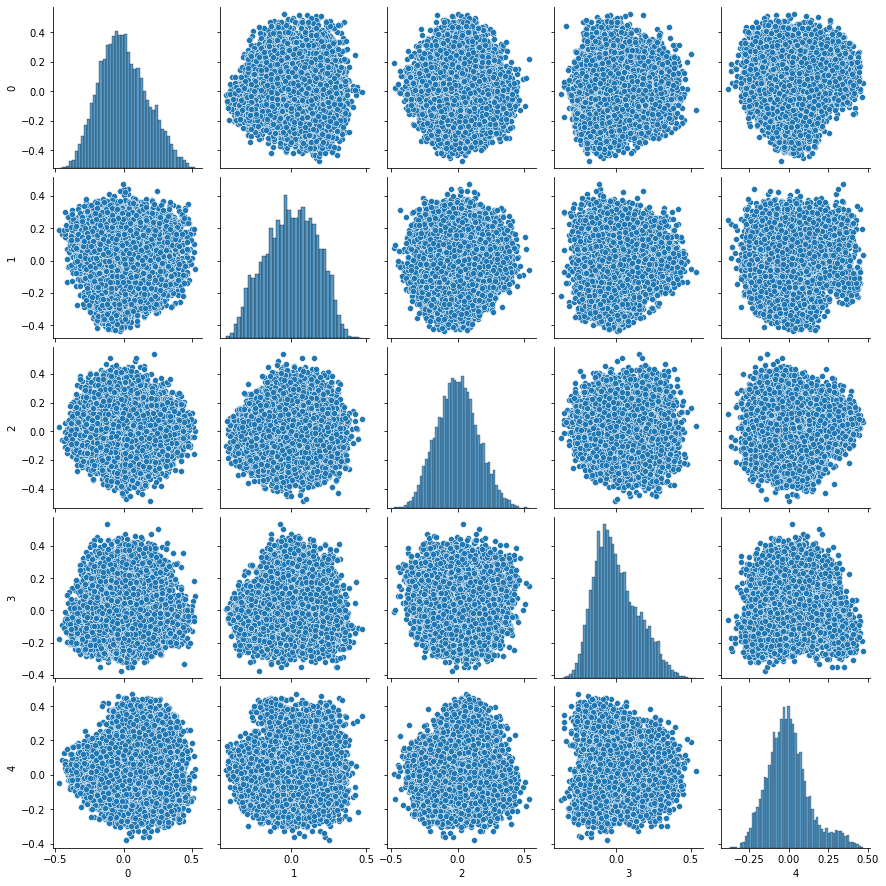

In [108]:
sns.pairplot(pca_data)

In [109]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))
def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
    index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]

    movies_recomm =  data.iloc[index_recomm]['title'].values

    result = {'Movies':movies_recomm,'Index':index_recomm}
    if print_recommendation==True:
        print('The watched movie is this one: %s \n'%(data['title'].iloc[index]))
        k=1
        for movie in movies_recomm:
            print('The number %i recommended movie is this one: %s \n'%(k,movie))
    if print_recommendation_plots==True:
        print('The plot of the watched movie is this one:\n %s \n'%(data['overview'].iloc[index]))
        k=1
        for q in range(len(movies_recomm)):
            plot_q = data['overview'].loc[index_recomm[q]]
            print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
            k=k+1
    if print_genres==True:
        print('The genres of the watched movie is this one:\n %s \n'%(data['genre'].iloc[index]))
        k=1
        for q in range(len(movies_recomm)):
            plot_q = data['genre'].loc[index_recomm[q]]
            print('The plot of the number %i recommended movie is this one:\n %s \n'%(k,plot_q))
            k=k+1
    return result

In [117]:
give_recommendations(2,True)

The watched movie is this one: The Godfather 

The number 1 recommended movie is this one: The Godfather: Part II 

The number 1 recommended movie is this one: A Bronx Tale 

The number 1 recommended movie is this one: Jane Austen's Mafia! 

The number 1 recommended movie is this one: The Freshman 

The number 1 recommended movie is this one: We Own the Night 



{'Movies': array(['The Godfather: Part II', 'A Bronx Tale', "Jane Austen's Mafia!",
        'The Freshman', 'We Own the Night'], dtype=object),
 'Index': [7, 962, 8534, 6098, 4407]}

In [115]:
cos_sim_data.to_csv('cos_sim_data.csv', index=False)

In [114]:
df.to_csv('data.csv', index=False)

In [73]:
df = pd.read_csv('data.csv')
df

,img_url,title,year,certificate,duration,genre,imdb,metascore,overview,director,actors
0,https://m.media-amazon.com/images/S/sash/4Fyxw...,Hababam Sinifi,1975,3,87,"Comedy, Drama",9.3,NaN,"Lazy, uneducated students share a very close b...",Ertem Egilmez,Kemal Sunal\tMünir Özkul\tHalit Akçatepe\tTari...
1,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Shawshank Redemption,1994,0,142,Drama,9.3,81.0,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins\tMorgan Freeman\tBob Gunton\tWilli...
2,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Godfather,1972,3,175,"Crime, Drama",9.2,100.0,The aging patriarch of an organized crime dyna...,Francis Ford Coppola,Marlon Brando\tAl Pacino\tJames Caan\tDiane Ke...
3,https://m.media-amazon.com/images/S/sash/4Fyxw...,Aynabaji,2016,3,147,"Crime, Mystery, Thriller",9.0,NaN,Ayna is an actor and the prison is his stage. ...,Amitabh Reza Chowdhury,Chanchal Chowdhury\tMasuma Rahman Nabila\tPart...
4,https://m.media-amazon.com/images/S/sash/4Fyxw...,The Dark Knight,2008,3,152,"Action, Crime, Drama",9.0,84.0,When the menace known as the Joker wreaks havo...,Christopher Nolan,Christian Bale\tHeath Ledger\tAaron Eckhart\tM...
...,...,...,...,...,...,...,...,...,...,...,...
9697,https://m.media-amazon.com/images/S/sash/4Fyxw...,Smolensk,2016,3,120,"Drama, Thriller",1.2,NaN,An inspired story of people affected by the tr...,Antoni Krauze,Beata Fido\tMaciej Póltorak\tAldona Struzik\tL...
9698,https://m.media-amazon.com/images/S/sash/4Fyxw...,Daniel der Zauberer,2004,3,81,"Comedy, Crime, Fantasy",1.2,NaN,"Evil assassins want to kill Daniel Kublbock, t...",Ulli Lommel,Daniel Küblböck\tUlli Lommel\tRudolf Waldemar ...
9699,https://m.media-amazon.com/images/S/sash/4Fyxw...,Sadak 2,2020,3,133,"Action, Drama",1.1,NaN,"The film picks up where Sadak left off, revolv...",Mahesh Bhatt,Alia Bhatt\tSanjay Dutt\tPriyanka Bose\tAditya...
9700,https://m.media-amazon.com/images/S/sash/4Fyxw...,Cumali Ceber: Allah Seni Alsin,2017,0,100,Comedy,1.0,NaN,Cumali Ceber goes to a vacation with his child...,Gökhan Gök,Halil Söyletmez\tDoga Konakoglu\tEmre Keskin\t...


In [41]:
embeddings.shape

(9702, 768)